In [2]:
# Import libraries / packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import dataset
df = pd.read_csv('dataset.csv')

# Declare feature vector and target variable
X = df.drop('class', axis=1)
y = df['class']

In [4]:
# Split data into training dataset (80%) and testing dataset (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier with n_estimators = 100 (default)
rfc = RandomForestClassifier(random_state=0)

# Fit classifier to training set
rfc.fit(X_train, y_train)

# Make predictions on test set
y_pred = rfc.predict(X_test)

In [6]:
# View the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

feature2    0.292606
feature3    0.202449
feature6    0.164390
feature7    0.126195
feature5    0.071294
feature1    0.059349
feature8    0.052079
feature4    0.025212
feature9    0.006425
dtype: float64

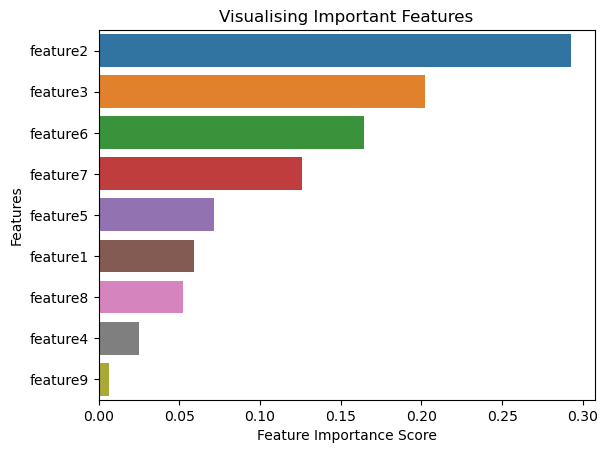

In [7]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualising Important Features")

# Visualise the graph
plt.show()

In [8]:
# Compute and print accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9571


In [9]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.95535714 0.95535714 0.99107143 0.98214286 0.92857143]


In [10]:
# Compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9625


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]      # Maximum depth of the trees
}

# Instantiate the Random Forest classifier
rfc = RandomForestClassifier(random_state=0)

# Instantiate GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [12]:
# Examine the best model

# Print parameters that give the best results
print('Parameters that give the best results:', (grid_search.best_params_))

# Get the best estimator that was chosen by the GridSearch
best_rfc = grid_search.best_estimator_
print('\n\nEstimator that was chosen by the search:', (best_rfc))

# Evaluate the best model on the test set
y_pred_best = best_rfc.predict(X_test)

# Compute accuracy score
best_accuracy = accuracy_score(y_test, y_pred_best)

# Print the accuracy score of the best model
print('\n\n', 'Model accuracy score with best hyperparameters: {:.4f}'.format(best_accuracy))

Parameters that give the best results: {'max_depth': None, 'n_estimators': 50}


Estimator that was chosen by the search: RandomForestClassifier(n_estimators=50, random_state=0)


 Model accuracy score with best hyperparameters: 0.9643


In [13]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[92  2]
 [ 3 43]]

True Positives(TP) =  92

True Negatives(TN) =  43

False Positives(FP) =  2

False Negatives(FN) =  3


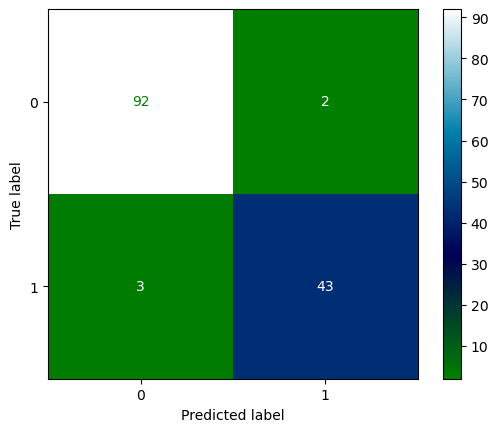

In [14]:
# Visualise confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(cm).plot(cmap='ocean')

In [15]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.96      0.93      0.95        46

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [16]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [17]:
# Print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9643


In [18]:
# Print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0357


C:\Users\ASUS\AppData\Local\Temp\ipykernel_232\221959580.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_pca[y_train == j, 0], X_pca[y_train == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


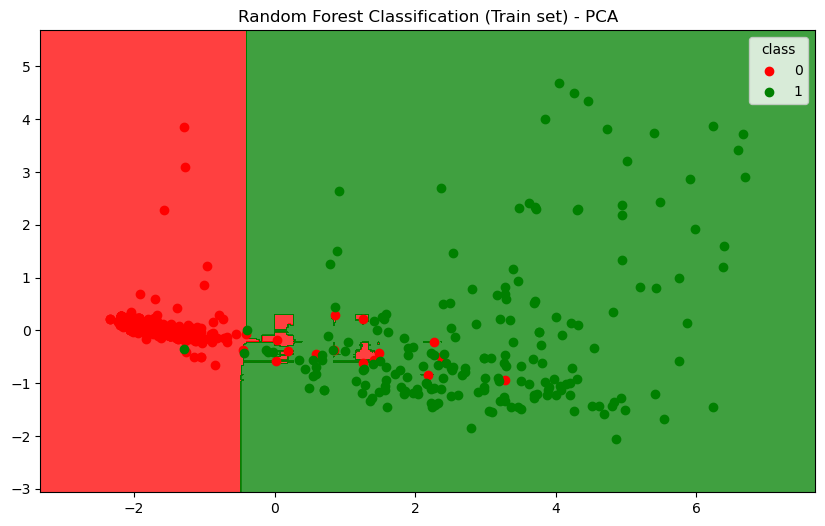

In [19]:
# Make a decision boundary plot

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train a Random Forest classifier
best_rfc.fit(X_pca, y_train)

# Creating meshgrid for visualisation
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Making predictions on the meshgrid points
Z = best_rfc.predict(np.c_[xx.ravel(), yy.ravel()])  

# Reshaping Z
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plotting the data points
for i, j in enumerate(np.unique(y)):
    plt.scatter(X_pca[y_train == j, 0], X_pca[y_train == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

# Adding title
plt.title('Random Forest Classification (Train set) - PCA')
plt.legend(title='class')

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_232\2818828122.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_pca[y_test == j, 0], X_pca[y_test == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


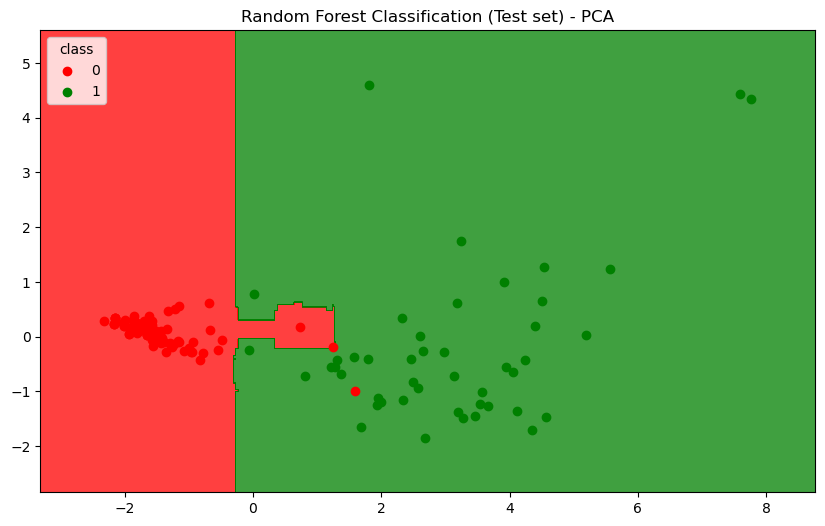

In [20]:
# Make a decision boundary plot

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train a Random Forest classifier
best_rfc.fit(X_pca, y_test)

# Creating meshgrid for visualisation
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Making predictions on the meshgrid points
Z = best_rfc.predict(np.c_[xx.ravel(), yy.ravel()])  

# Reshaping Z
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plotting the data points
for i, j in enumerate(np.unique(y)):
    plt.scatter(X_pca[y_test == j, 0], X_pca[y_test == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

# Adding title
plt.title('Random Forest Classification (Test set) - PCA')
plt.legend(title='class')

plt.show()